## 6. Implementing a 5 qubit Quantum Fourier Transform 


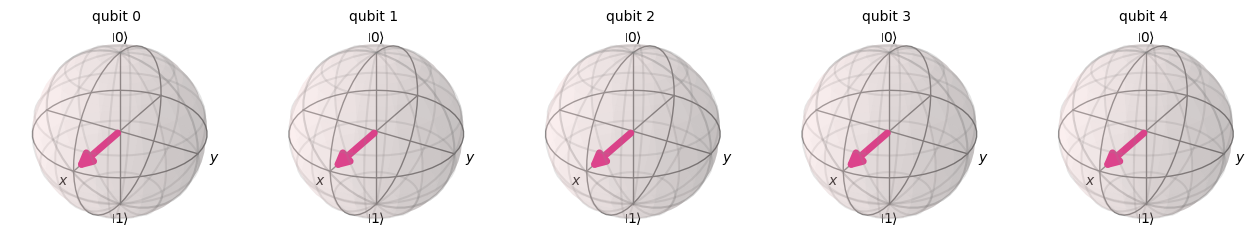

In [7]:
from qiskit import QuantumCircuit

from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

def qft(circuit, n):
    """
    Apply Quantum Fourier Transform to the first n qubits in the given circuit.
    Args:
        circuit (QuantumCircuit): The quantum circuit to which QFT is applied.
        n (int): Number of qubits to perform QFT on.
    """
    for i in range(n):
        # Apply Hadamard gate to the i-th qubit
        circuit.h(i)
        
        # Apply controlled-phase gates with increasing phase angle
        for j in range(i+1, n):
            angle = np.pi / (2**(j-i))
            circuit.cp(angle, j, i)

    # Swap qubits to reverse their order
    for i in range(n//2):
        circuit.swap(i, n-i-1)
        
    return circuit

# Number of qubits
n_qubits = 5

# Create a quantum circuit with 5 qubits
qc = QuantumCircuit(n_qubits)

# Apply the QFT to the circuit
qc = qft(qc, n_qubits)

# Draw the circuit
qc.draw(output="mpl")
plt.show()

# Optionally simulate and visualize the result on the Bloch sphere
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(qc, simulator)
sim_result = simulator.run(compiled_circuit).result()
counts = sim_result.get_counts()
statevector = sim_result.get_statevector()

plot_bloch_multivector(statevector)



In [9]:
plt.show()